<a href="https://colab.research.google.com/github/Honey1315/Fault_Classification_ANN/blob/main/Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['font.size'] = 20
warnings.filterwarnings('ignore')

In [ ]:
pd1 = pd.read_csv('fault_AB.csv')
pd2 = pd.read_csv('fault_BC.csv')
pd3 = pd.read_csv('fault_CA.csv')
pd4 = pd.read_csv('no_fault.csv')
pd5 = pd.read_csv('fault_AG.csv')
pd6 = pd.read_csv('fault_BG.csv')
pd7 = pd.read_csv('fault_CG.csv')
pd8 = pd.read_csv('fault_ABG.csv')
pd9 = pd.read_csv('fault_BCG.csv')
pd10 = pd.read_csv('fault_ACG.csv')
pd11 = pd.read_csv('fault_ABC.csv')
pd12 = pd.read_csv('fault_ABCG.csv')


In [ ]:
all_combined=pd.concat([pd1,pd2,pd3,pd4,pd5,pd6,pd7,pd8,pd9,pd10,pd11,pd12])
all_combined.drop(columns=['Va_L','Ia_L','Vb_L','Ib_L','Vc_L','Ic_L'],axis=1,inplace=True)
all_combined.head()
# shuffled=all_combined.sample(frac=1)
# shuffled.head()
train , test = train_test_split(all_combined,test_size=0.2, random_state=48, shuffle=True)
train.head()
len(train)

864009

In [ ]:
print(test)
# len(test)

        G  C  B  A     Va_G     Vb_G     Vc_G     Ia_G     Ib_G     Ic_G
53609   1  0  1  1 -3643.40  -990.35  7115.00 -628.850  790.550   42.537
20338   1  1  1  1   499.65 -3000.40  2500.70 -897.400  297.540  599.860
16896   1  1  0  0 -7943.80  7168.10   457.24  -48.246   90.258 -630.220
74537   0  1  1  1 -2230.60  3126.90  -896.36  635.910  250.870 -886.780
76421   0  1  1  0  8750.50 -3960.10 -4790.30   78.984 -817.600  738.610
...    .. .. .. ..      ...      ...      ...      ...      ...      ...
153941  0  0  0  0 -8041.10  1023.30  7017.80  -81.121   32.197   48.925
25056   0  1  0  1  5457.70 -7766.00  2308.40 -596.780  -80.200  676.980
39070   0  1  1  0  8354.00 -4686.20 -3667.70   67.819 -817.090  749.270
64895   1  0  0  1 -4325.60  7241.10   500.92  146.420   68.968  -27.336
39830   0  0  0  0  1005.10  7028.70 -8033.80   32.039   49.062  -81.101

[216003 rows x 10 columns]


In [ ]:
train['faultType'] = train['G'] + train['C']*2 + train['B']*4 + train['A']*8
# z=np.array(train['faultType'])
# np.unique(z)
train['faultType'] = train['faultType'].apply(lambda x: x-2 if x >= 3 else x)
train['faultType'] = train['faultType'].apply(lambda x: x-1 if x >= 3 else x)
train['faultType'] = train['faultType'].apply(lambda x: x-1 if x >= 6 else x)
# train.head()
# z=np.array(train['faultType'])
# np.unique(z)
train.drop(columns=['G','C','B','A'],axis=1,inplace=True)
train.head()

,Va_G,Vb_G,Vc_G,Ia_G,Ib_G,Ic_G,faultType
5613,-7653.10,145.55,7507.60,-79.743,24.499,55.244,0
28972,-350.38,-3942.60,4293.00,-455.030,-14.566,469.590,6
51759,3130.10,-909.31,-2220.80,247.180,-885.840,638.660,11
21624,-2163.30,-984.90,3148.20,-699.170,859.710,-160.540,11
74064,3079.70,-2355.30,-724.39,-235.280,-647.430,882.710,11


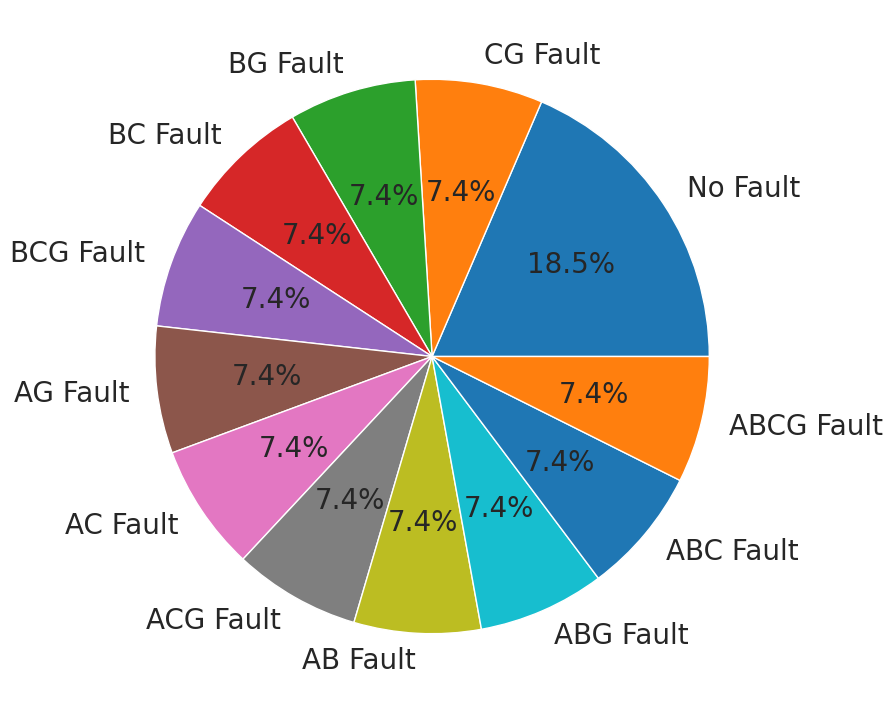

In [ ]:
plt.pie(train['faultType'].value_counts(), autopct='%1.1f%%',
       labels=['No Fault', 'CG Fault', 'BG Fault', 'BC Fault', 'BCG Fault', 'AG Fault', 'AC Fault', 'ACG Fault', 'AB Fault','ABG Fault', 'ABC Fault','ABCG Fault'])
plt.show()

In [ ]:
X = train.drop(['faultType'], axis=1)
y = train['faultType']
X.head()
X_arr=np.array(X)
Y_arr=np.array(y)
print(X_arr.shape)

(864009, 6)


In [ ]:
test['faultType'] = test['G'] + test['C']*2 + test['B']*4 + test['A']*8
# z=np.array(train['faultType'])
# np.unique(z)
test['faultType'] = test['faultType'].apply(lambda x: x-2 if x >= 3 else x)
test['faultType'] = test['faultType'].apply(lambda x: x-1 if x >= 3 else x)
test['faultType'] = test['faultType'].apply(lambda x: x-1 if x >= 6 else x)
# train.head()
# z=np.array(train['faultType'])
# np.unique(z)
test.drop(columns=['G','C','B','A'],axis=1,inplace=True)
test.head()

,Va_G,Vb_G,Vc_G,Ia_G,Ib_G,Ic_G,faultType
53609,-3643.40,-990.35,7115.00,-628.850,790.550,42.537,9
20338,499.65,-3000.40,2500.70,-897.400,297.540,599.860,11
16896,-7943.80,7168.10,457.24,-48.246,90.258,-630.220,1
74537,-2230.60,3126.90,-896.36,635.910,250.870,-886.780,10
76421,8750.50,-3960.10,-4790.30,78.984,-817.600,738.610,3


In [ ]:
X_test = test.drop(['faultType'], axis=1)
y_test = test['faultType']
# X_test.head()
X_test_arr=np.array(X_test)
Y_test_arr=np.array(y_test)

In [ ]:
y_train_encoded = to_categorical(Y_arr, num_classes=12)
y_test_encoded = to_categorical(Y_test_arr, num_classes=12)

model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(12, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_arr, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test_arr, y_test_encoded, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/20
21601/21601 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.8300 - loss: 16.5781 - val_accuracy: 0.9220 - val_loss: 0.1464
Epoch 2/20
21601/21601 ━━━━━━━━━━━━━━━━━━━━ 99s 4ms/step - accuracy: 0.9197 - loss: 0.1697 - val_accuracy: 0.9231 - val_loss: 0.1353
Epoch 3/20
21601/21601 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 0.9233 - loss: 0.1393 - val_accuracy: 0.9244 - val_loss: 0.1440
Epoch 4/20
21601/21601 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.9228 - loss: 0.1419 - val_accuracy: 0.9247 - val_loss: 0.1187
Epoch 5/20
21601/21601 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.9226 - loss: 0.1389 - val_accuracy: 0.9249 - val_loss: 0.1147
Epoch 6/20
21601/21601 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9233 - loss: 0.1347 - val_accuracy: 0.9212 - val_loss: 0.1326
Epoch 7/20
21601/21601 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9232 - loss: 0.1371 - val_accuracy: 0.9248 - val_loss: 0.1163
Epoch 8/20
21601/21601 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy:

In [ ]:

predictions = model.predict(X_test_arr)
predicted_classes = np.argmax(predictions, axis=1)

print("Sample predictions:")
for i in range(20):
    print(f"True class: {Y_test_arr[i]}, Predicted class: {predicted_classes[i]}")

6751/6751 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
Sample predictions:
True class: 9, Predicted class: 9
True class: 11, Predicted class: 10
True class: 1, Predicted class: 1
True class: 10, Predicted class: 10
True class: 3, Predicted class: 3
True class: 5, Predicted class: 5
True class: 4, Predicted class: 4
True class: 3, Predicted class: 3
True class: 11, Predicted class: 10
True class: 8, Predicted class: 8
True class: 4, Predicted class: 4
True class: 3, Predicted class: 3
True class: 1, Predicted class: 1
True class: 0, Predicted class: 0
True class: 3, Predicted class: 3
True class: 7, Predicted class: 7
True class: 6, Predicted class: 6
True class: 7, Predicted class: 7
True class: 3, Predicted class: 3
True class: 4, Predicted class: 4


In [ ]:
to_predict=[-3643.40, 	-990.35, 	7115.00, 	-628.850, 	790.550, 	42.537]
to_predict=np.array(to_predict)
to_predict=to_predict.reshape(1,-1)
p=model.predict(to_predict)
# print(p)
result = (np.argmax(p))
print(result)
fault=['No Fault', 'CG', 'BG', 'BC', 'BCG', 'AG', 'AC', 'ACG', 'AB', 'ABG', 'ABC', 'ABCG']
print(fault[result])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
9
ABG


In [ ]:
print("\nTraining and Validation Accuracy:")
for epoch, (train_acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy']), 1):
    print(f"Epoch {epoch:3d}: Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")


Training and Validation Accuracy:
Epoch   1: Training Accuracy: 0.8875, Validation Accuracy: 0.9217
Epoch   2: Training Accuracy: 0.9212, Validation Accuracy: 0.9245
Epoch   3: Training Accuracy: 0.9224, Validation Accuracy: 0.9242
Epoch   4: Training Accuracy: 0.9231, Validation Accuracy: 0.9244
Epoch   5: Training Accuracy: 0.9228, Validation Accuracy: 0.9251


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_arr, y_test_encoded, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


Final Test Accuracy: 0.9235


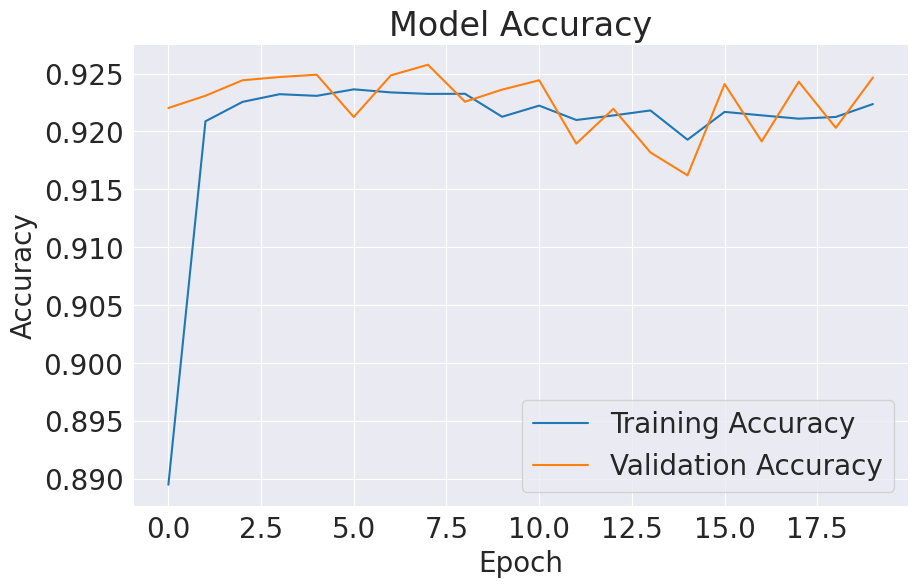

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

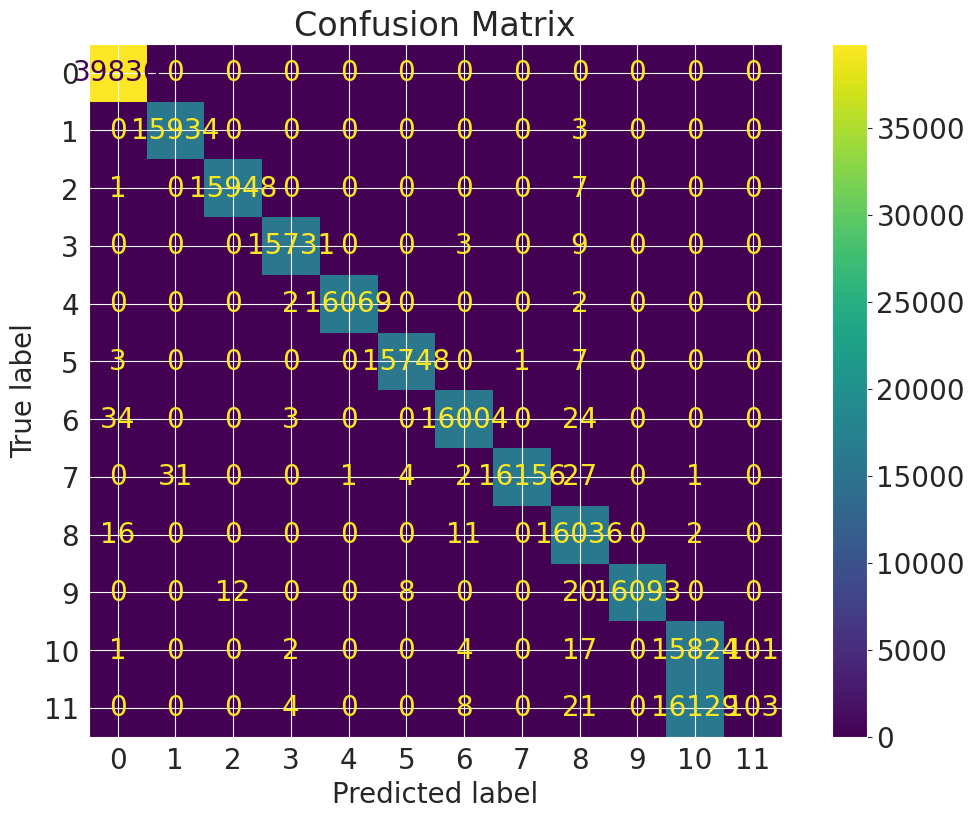


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39836
           1       1.00      1.00      1.00     15937
           2       1.00      1.00      1.00     15956
           3       1.00      1.00      1.00     15743
           4       1.00      1.00      1.00     16073
           5       1.00      1.00      1.00     15759
           6       1.00      1.00      1.00     16065
           7       1.00      1.00      1.00     16222
           8       0.99      1.00      0.99     16065
           9       1.00      1.00      1.00     16133
          10       0.50      0.99      0.66     15949
          11       0.50      0.01      0.01     16265

    accuracy                           0.92    216003
   macro avg       0.92      0.92      0.89    216003
weighted avg       0.92      0.92      0.90    216003



In [ ]:
cm = confusion_matrix(Y_test_arr, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(12))
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))